# Data Cleaning for Amazon Sales Data Analysis

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Reading file and storing it in a dataframe

In [2]:
df=pd.read_excel('C:\\Users\\KIIT\\Desktop\\ineuron assignments\\Amazon sales data analysis\\DATA\\SALESDATA.xls')

## Understanding the dataset

In [3]:
df.head()



,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,...,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,Unnamed: 20,Unnamed: 21
0,10000481,2017-04-30,-237.91,2017-04-30,100012,NaN,NaN,Urban Large Eggs,2000,0.00,...,237.91,0.00,0.0,237.91,237.910000,1,184,EA,NaN,U/M = unit of measure
1,10002220,2017-07-14,368.79,2017-07-14,100233,P01,20910,Moms Sliced Turkey,1000,824.96,...,456.17,824.96,0.0,456.17,456.170000,1,127,EA,NaN,NaN
2,10002220,2017-10-17,109.73,2017-10-17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,...,438.93,548.66,0.0,438.93,438.930000,1,127,EA,NaN,EA = each
3,10002489,2017-06-03,-211.75,2017-06-03,100096,NaN,NaN,Kiwi Lox,1000,0.00,...,211.75,0.00,0.0,211.75,211.750000,1,160,EA,NaN,NaN
4,10004516,2017-05-27,96627.94,2017-05-27,103341,P01,60776,High Top Sweet Onion,1000,408.52,...,89248.66,185876.60,0.0,89248.66,196.150901,455,124,SE,NaN,SE = some SI unit like kgs or gallons


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65282 entries, 0 to 65281
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   CustKey                           65282 non-null  int64         
 1   DateKey                           65282 non-null  datetime64[ns]
 2   Discount Amount                   65280 non-null  float64       
 3   Invoice Date                      65282 non-null  datetime64[ns]
 4   Invoice Number                    65282 non-null  int64         
 5   Item Class                        56993 non-null  object        
 6   Item Number                       65241 non-null  object        
 7   Item                              65282 non-null  object        
 8   Line Number                       65282 non-null  int64         
 9   List Price                        65282 non-null  float64       
 10  Order Number                      65282 non-nu

In [5]:
df.shape

(65282, 22)

### Creating table for missing data analysis

In [6]:

def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [7]:
draw_missing_data_table(df)

,Total,Percent
Unnamed: 20,65282,1.000000
Unnamed: 21,65278,0.999939
Item Class,8289,0.126972
Item Number,41,0.000628
Discount Amount,2,0.000031
Sales Price,1,0.000015
List Price,0,0.000000
DateKey,0,0.000000
Invoice Date,0,0.000000
Invoice Number,0,0.000000


### Dropping column 'Unamed: 20' and 'Unamed: 21' due to almost 100% missing values

In [8]:
df.drop(df.iloc[:, 20:], inplace = True, axis = 1)

### Analysing 'Item Class' Attribute

In [9]:
print(pd.unique(df['Item Class']))

[nan 'P01' 'PO1']


#### Dropping Item class attribute since it has only one possible value 'P01'. The Item Class for all the items belong to the food class. 

In [10]:
df=df.drop(['Item Class'], axis=1)

### Order number is not an important attribute to understand the trends of sale


In [11]:

df=df.drop(['Order Number'], axis=1)

### Deleting rows with missing values

In [12]:
df.dropna(subset = ["Item Number"], inplace=True)

In [13]:
df.dropna(subset = ["Discount Amount"], inplace=True)

In [14]:
df.dropna(subset = ["Sales Price"], inplace=True)

## Deleting Duplicate rows if any

In [15]:
df.drop_duplicates(keep=False,inplace=True)

### Checking whether there are any more missing values left

In [16]:
draw_missing_data_table(df)

,Total,Percent
U/M,0,0.0
Sales Rep,0,0.0
DateKey,0,0.0
Discount Amount,0,0.0
Invoice Date,0,0.0
Invoice Number,0,0.0
Item Number,0,0.0
Item,0,0.0
Line Number,0,0.0
List Price,0,0.0


# Data Validation

In [17]:
min(df['Promised Delivery Date'])

Timestamp('2008-12-15 00:00:00')

In [18]:
max(df['Promised Delivery Date'])

Timestamp('2019-12-31 00:00:00')

In [19]:
min(df['Invoice Date'])

Timestamp('2017-01-01 00:00:00')

In [20]:
max(df['Invoice Date'])

Timestamp('2019-12-31 00:00:00')

### Clearly a product that is earliest purchased in 2017 cannot be delivered earlier than 2017. Earliest Delivery Date is 2008!

In [21]:
comparison_column = np.where(df["Invoice Date"] <= df["Promised Delivery Date"], True, False)
# because an item cannot be delivered before it is purchased

In [22]:
print(comparison_column)

[ True False  True ...  True  True  True]


In [23]:
df["Checking Validation for Date"] = comparison_column
print(df)

        CustKey    DateKey  Discount Amount Invoice Date  Invoice Number  \
1      10002220 2017-07-14          368.790   2017-07-14          100233   
2      10002220 2017-10-17          109.730   2017-10-17          116165   
4      10004516 2017-05-27        96627.940   2017-05-27          103341   
6      10007866 2017-09-03          371.014   2017-09-03          100403   
7      10009356 2017-06-18          608.080   2017-06-18          105481   
...         ...        ...              ...          ...             ...   
65277  10017638 2018-03-21          505.780   2018-03-21          226497   
65278  10017638 2018-03-21          410.750   2018-03-21          226497   
65279  10017638 2018-03-21          876.160   2018-03-21          226497   
65280  10017638 2018-03-21        24226.770   2018-03-21          226498   
65281  10017638 2018-03-21        24479.260   2018-03-21          226498   

      Item Number                             Item  Line Number  List Price  \
1       

In [24]:
df.drop(df[df['Checking Validation for Date'] == False].index, inplace = True)
print(df)

        CustKey    DateKey  Discount Amount Invoice Date  Invoice Number  \
1      10002220 2017-07-14          368.790   2017-07-14          100233   
4      10004516 2017-05-27        96627.940   2017-05-27          103341   
6      10007866 2017-09-03          371.014   2017-09-03          100403   
7      10009356 2017-06-18          608.080   2017-06-18          105481   
8      10009356 2017-06-18          424.800   2017-06-18          105481   
...         ...        ...              ...          ...             ...   
65277  10017638 2018-03-21          505.780   2018-03-21          226497   
65278  10017638 2018-03-21          410.750   2018-03-21          226497   
65279  10017638 2018-03-21          876.160   2018-03-21          226497   
65280  10017638 2018-03-21        24226.770   2018-03-21          226498   
65281  10017638 2018-03-21        24479.260   2018-03-21          226498   

      Item Number                          Item  Line Number  List Price  \
1          

In [25]:
df.drop(['Checking Validation for Date'], axis = 1)

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Number,Item,Line Number,List Price,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
1,10002220,2017-07-14,368.790,2017-07-14,100233,20910,Moms Sliced Turkey,1000,824.960,2017-07-14,456.17,824.960,0.00,456.17,456.170000,1,127,EA
4,10004516,2017-05-27,96627.940,2017-05-27,103341,60776,High Top Sweet Onion,1000,408.520,2017-05-28,89248.66,185876.600,0.00,89248.66,196.150901,455,124,SE
6,10007866,2017-09-03,371.014,2017-09-03,100403,20910,Moms Sliced Turkey,2000,795.314,2017-09-03,424.30,795.314,0.00,424.30,424.300000,1,149,EA
7,10009356,2017-06-18,608.080,2017-06-18,105481,62550,Tell Tale Garlic,29000,575.000,2017-06-18,541.92,1150.000,0.00,541.92,270.960000,2,103,EA
8,10009356,2017-06-18,424.800,2017-06-18,105481,60794,High Top Walnuts,18000,51.880,2017-06-18,353.40,778.200,0.00,353.40,23.560000,15,103,EA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65277,10017638,2018-03-21,505.780,2018-03-21,226497,13447,High Top Oranges,8000,119.520,2018-03-21,569.90,1075.680,239.95,329.95,63.322222,9,180,EA
65278,10017638,2018-03-21,410.750,2018-03-21,226497,25906,Landslide White Sugar,38000,436.780,2018-03-21,462.81,873.560,423.55,39.26,231.405000,2,180,EA
65279,10017638,2018-03-21,876.160,2018-03-21,226497,61856,Moms Potato Salad,227001,232.920,2018-03-21,987.20,1863.360,574.00,413.20,123.400000,8,180,EA
65280,10017638,2018-03-21,24226.770,2018-03-21,226498,17801,Better Fancy Canned Sardines,1000,1431.230,2018-03-21,27297.51,51524.280,16188.90,11108.61,758.264167,36,180,EA


## Storing the clean dataset in a new file

In [27]:
#df.to_excel("Amazon_Sales_Data_CLEANED.xlsx")

# Performing EDA on the Cleaned Data

## Importing required libraries

In [28]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML
import statsmodels.api as sm
import pylab
# figures inline in notebook
%matplotlib inline
np.set_printoptions(suppress=True)
pd.set_option('display.max_rows',20)
plt.rcParams['figure.figsize'] = [15,5]

In [29]:
df.describe()

,CustKey,Discount Amount,Invoice Number,Line Number,List Price,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep
count,5.628200e+04,56282.000000,56282.000000,56282.000000,56282.000000,56282.000000,56282.000000,56282.000000,56282.000000,56282.000000,56282.000000,56282.000000
mean,1.001779e+07,1729.033502,216454.812107,22073.082406,506.657652,2839.132414,4568.165916,1656.480619,1182.651795,279.206710,50.165417,136.866600
std,7.218627e+03,9077.565023,94931.246794,30054.769212,444.058399,15919.899975,21142.366179,10076.062534,6108.870514,247.339369,462.277360,26.492553
min,1.000045e+07,-255820.800000,100034.000000,1000.000000,0.000000,200.010000,0.000000,0.000000,-3932.930000,0.337341,1.000000,103.000000
25%,1.001272e+07,241.987500,118225.000000,3000.000000,181.522500,304.630000,560.160000,166.300000,127.980000,99.283765,2.000000,113.000000
50%,1.001990e+07,425.655000,222931.000000,11000.000000,321.640000,540.470000,966.440000,296.820000,240.680000,179.820000,3.000000,131.000000
75%,1.002352e+07,918.141200,314782.750000,30000.000000,798.270000,1204.350000,2169.220000,638.100000,542.152500,439.170000,8.000000,160.000000
max,1.002758e+07,343532.660000,332842.000000,344000.000000,2760.700000,555376.000000,632610.160000,366576.000000,188800.000000,6035.000000,16000.000000,185.000000


# KEY FINDINGS : (General Data Description)
### 1) Minimum list price is 0. Hence atleast 1 product has been sold for free
### 2) Max loss for a particular purchase is Rs. 3932.930000 (Sales Margin Amount)
### 3) Max profit for a particular purchase is Rs. 188800.000000 (Sales Margin Amount)
### 4) Minimum Discount Amount is Rs.(-255820.800000). Negative Discount Amount Represents that (Sales Amount Based on List Price) < (Sales Margin Amount), since, (Sales Amount Based On List Price) - (Discount Amount) = (Sales Margin Amount). Therefore, a negative Discount Amount indicates a sure Profit in that purchase. (assuming Sales Amount Based on List Price is a positive number)
### 5)An Average profit of Rs. 1182.651795 has been made in each purchase.

In [30]:
df.corr(method='pearson')

,CustKey,Discount Amount,Invoice Number,Line Number,List Price,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,Checking Validation for Date
CustKey,1.000000,-0.022572,-0.070655,0.069636,-0.017208,0.021027,0.006142,0.021343,0.019594,-0.016812,0.033397,-0.128950,NaN
Discount Amount,-0.022572,1.000000,0.009688,-0.046484,0.051911,0.384580,0.718937,0.353507,0.419146,0.027456,0.085491,0.003059,NaN
Invoice Number,-0.070655,0.009688,1.000000,0.002447,0.010044,-0.001473,0.003050,0.002127,-0.007347,-0.015616,0.000639,0.000164,NaN
Line Number,0.069636,-0.046484,0.002447,1.000000,-0.065949,-0.071248,-0.073607,-0.067993,-0.073526,-0.089898,-0.063239,-0.132831,NaN
List Price,-0.017208,0.051911,0.010044,-0.065949,1.000000,-0.031325,-0.001299,-0.035362,-0.023307,0.968843,-0.101564,0.023942,NaN
Sales Amount,0.021027,0.384580,-0.001473,-0.071248,-0.031325,1.000000,0.918107,0.990126,0.972902,-0.030498,0.838447,0.046106,NaN
Sales Amount Based on List Price,0.006142,0.718937,0.003050,-0.073607,-0.001299,0.918107,1.000000,0.897330,0.912543,-0.011176,0.668044,0.036031,NaN
Sales Cost Amount,0.021343,0.353507,0.002127,-0.067993,-0.035362,0.990126,0.897330,1.000000,0.930882,-0.035420,0.875019,0.042507,NaN
Sales Margin Amount,0.019594,0.419146,-0.007347,-0.073526,-0.023307,0.972902,0.912543,0.930882,1.000000,-0.021056,0.741749,0.050042,NaN
Sales Price,-0.016812,0.027456,-0.015616,-0.089898,0.968843,-0.030498,-0.011176,-0.035420,-0.021056,1.000000,-0.097671,0.057860,NaN


<AxesSubplot:>

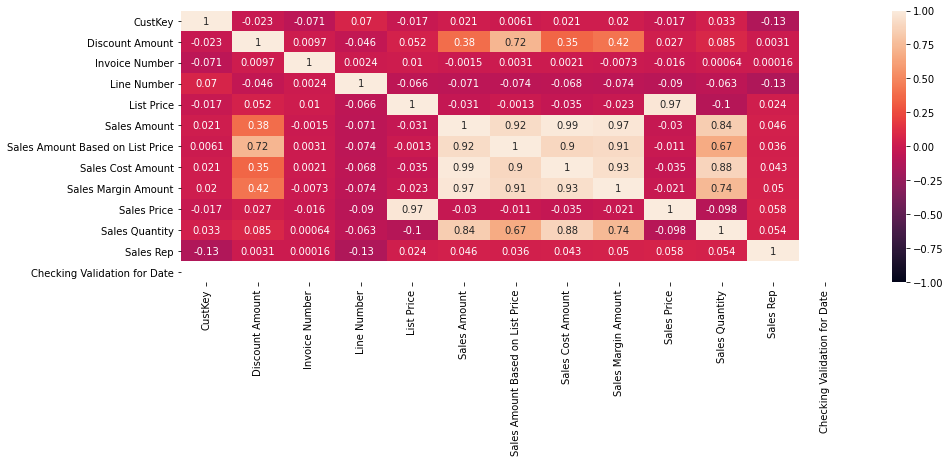

In [31]:
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)

# Key findings on CORRELATION (The following are strongly correlated):


### 1) 0.99 : Sale Amount & Sale Cost Amount
#### Probable Reason: Sale Amount = (Sale Cost Amount) + (Sale Margin Amount)

### 2) 0.97 : Sale Margin Amount & Sale Amount
#### Probable Reason: Sale Amount = (Sale Cost Amount) + (Sale Margin Amount)

### 3) 0.96 : Sale Price & List Price
#### Probable Reason: Sale price is the negotiated price from the list price ie, Sale Amount = (Sale Cost Amount) + (Sale Margin Amount)

### 4) 0.93 : Sale Cost Amount and Sales Margin Amount
#### Probable Reason: Sale Amount - (Sale Cost Amount) = (Sale Margin Amount)

### 5) 0.91 : Sales Amount Based on List Price & Sales Margin Amount
#### Probable Reason: Sales Margin = Sales Amount Based on List Price - (Discount Amount)

### 6) 0.90 : Sales Cost Amount & Sales Amount Based on List Price
#### Probable Reason: Sales Amount Based on List price + Sale Cost Amount = Sale Amount + Discount Amount

### 7) 0.86 : Sale Cost Amount & Sale Quantity
#### Probable Reason: The cost of selling a product is directly proportional to its quantity. For example, Cost of packaging and shipping 10 items is more than 1 item.

### 8) 0.82 : Sales Amount & Sales Quantity
#### Probable Reason: Sale Price * Quantity = Sales Amount 

### 9) 0.75 : Discount Amount & Amount Based on List Price
#### Probable Reason: Sales Amount Based On List Price - Sales Margin Amount = Discount Amount 


In [32]:
df.mode()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Number,Item,Line Number,List Price,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,Checking Validation for Date
0,10019194.0,2017-06-27,0.0,2017-06-27,116099,17801,Better Fancy Canned Sardines,1000.0,298.0,2017-06-27,784.97,1431.23,449.69,5317.17,817.68,1.0,108.0,EA,True
1,NaN,NaT,NaN,NaT,129620,NaN,NaN,NaN,NaN,NaT,817.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Key Findings: (MODE)
### 1) Better Fancy Canned Sardines (Item Number: 17801) is the most sold item.
### 2) Most people Purchase only 1 product at a time.
### 3) Sales Rep '108' made most number of selling products.
### 4) Customer with Customer Key '10019194.0' made maximum purchases.
### 5) Maximum purchases were made on '27-06-2017'. (Why?)


# Univariate Analysis

In [33]:
df['Year']=df['DateKey'].apply(lambda x:str(x)[:4])
df['Month']=df['DateKey'].apply(lambda x:str(x)[:7])
df['Day']=df['DateKey'].apply(lambda x:str(x)[8:10])
df['OnlyMonth']=df['DateKey'].apply(lambda x:str(x)[5:7])

 # 1) Discount Amount
It is an amount that is deducted from the original sale price.
The Discount Amount here is the Discount Amount of one item multiplied by its Quantity. Here, (Sales Amount Based On List Price) - (Discount Amount) = Sales Margin Amount

In [34]:
g=df.groupby('Year')['Discount Amount'].sum().round()
print(g)


Year
2017    44592463.0
2018     9816916.0
2019    42904085.0
Name: Discount Amount, dtype: float64


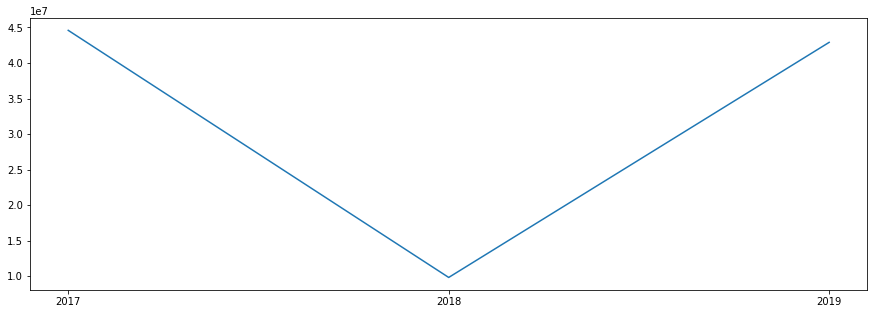

In [35]:
plt.plot(g.index, g.values)

### Maximum Discount Amount was in the year '2017' closely followed by '2019'. A significantly less discount amount (which is least) was in '2018'.

In [ ]:
sns.histplot(data = df, x = "Discount Amount", kde = True, hue = "Year")
plt.title('Histogram of Discount Amount ',fontsize=50,color='blue',pad=32)
plt.xlim(-260000,350000)






In [ ]:
k=df.groupby('Month')['Discount Amount'].sum().round()
print(k)

print(k[k == max(k)])

In [ ]:
plt.plot(k.index, k.values)
plt.title('Discount Amount vs Month of Each Year',fontsize=50,color='magenta',pad=32)

### Maximum Discount Amount was in the month of November in the year 2019

In [ ]:
k=df.groupby('Day')['Discount Amount'].sum().round()
print(k)
print("\n\n")
#The maximum discount amount in a day of a month 
print(k[k == max(k)])


In [ ]:
plt.plot(k.index, k.values)
plt.title('Discount Amount vs nth day of a Month',fontsize=50,color='magenta',pad=32)

### Hence, about on the 5th day of every month (average), the discount amount is maximum
### and about on the 2nd and 31st day ofevery month (average), the discount amount is minimum

In [ ]:
k=df.groupby('OnlyMonth')['Discount Amount'].sum().round()
print(k)
print("\n\n")
#The maximum discount amount in a day of a month 
print(k[k == max(k)])

In [ ]:
plt.plot(k.index, k.values)
plt.title('Discount Amount vs Month',fontsize=50,color='magenta',pad=32)

### Maximum discount amount on an average is on 'March' every year (2017-2019)
### Minimum discount amount on an average is on 'May' every year (2017-2019)

In [ ]:
sns.kdeplot(x='Discount Amount',data=df,hue='Year')
plt.title('Kernel Density Estimation of Discount Amount',fontsize=50,color='magenta',pad=32)